In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv("./data/pima-data.csv")
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [3]:
diabetes_map = {True: 1, False: 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [4]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [5]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


From the above table , we can infer that there are no correlations between the independent variables . So , we do not need to drop any parameter to eliminate multicollinearity 

In [6]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

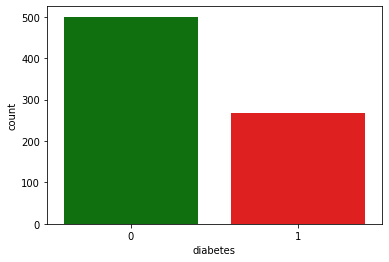

In [8]:
## count plot for target veriable
sns.countplot(df['diabetes'], palette=['green', 'red'])

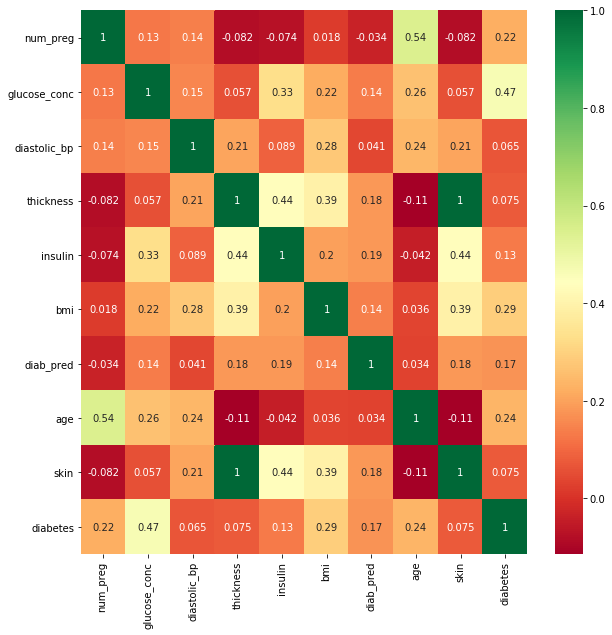

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':10}, cmap='RdYlGn')

In [60]:
dataset = df   # for other method

In [61]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [62]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [113]:
x[0]

array([  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
        50.   ,   1.379])

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [132]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
pickle.dump(sc, open('StandardScaler.pkl', 'wb'))

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

In [19]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.model_selection import cross_val_score

regressors = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machines' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier(),
    'XGBoost' : XGBClassifier()
}
results=pd.DataFrame(columns=['Accuracy '])
for method,func in regressors.items():
    func.fit(x_train,y_train)
    pred = func.predict(x_test)
    results.loc[method]= [
                          accuracy_score(y_test,pred),
                         ]
results

,Accuracy
Logistic Regression,0.824675
Decision Tree,0.772727
Random Forest,0.805195
Support Vector Machines,0.785714
K-nearest Neighbors,0.805195
XGBoost,0.759740


### Best Accuracy with Logistic Regression

In [21]:
Raw_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0]}]),
             (KNeighborsClassifier(),[{'n_neighbors':[5,10,6,7]}]),
             (SVC(),[{'C':[0.25,0.5,0.75,1],'kernel':['linear'],'random_state':[0]},{'C':[0.25,0.5,0.75,1],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'random_state':[0]}]),
             (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]),
             (RandomForestClassifier(),[{'n_estimators':[10,100,50,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]

In [64]:
for i,j in Raw_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(x_train,y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{} Best Accuracy : {:.2f}% and Best Parameters : {}'.format(i,best_accuracy*100,best_param))
    print('Best Parameters : ',best_param)

LogisticRegression() Best Accuracy : 76.05% and Best Parameters : {'C': 0.5, 'random_state': 0}
Best Parameters :  {'C': 0.5, 'random_state': 0}
KNeighborsClassifier() Best Accuracy : 73.60% and Best Parameters : {'n_neighbors': 5}
Best Parameters :  {'n_neighbors': 5}
SVC() Best Accuracy : 76.22% and Best Parameters : {'C': 0.25, 'kernel': 'linear', 'random_state': 0}
Best Parameters :  {'C': 0.25, 'kernel': 'linear', 'random_state': 0}
DecisionTreeClassifier() Best Accuracy : 71.16% and Best Parameters : {'criterion': 'entropy', 'random_state': 0}
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}
RandomForestClassifier() Best Accuracy : 75.90% and Best Parameters : {'criterion': 'gini', 'n_estimators': 150, 'random_state': 0}
Best Parameters :  {'criterion': 'gini', 'n_estimators': 150, 'random_state': 0}


In [23]:
reg = GaussianNB()
reg.fit(x_train,y_train)

GaussianNB()

In [24]:
y_NB = reg.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test,y_NB)
print(cm)
accuracy_score(y_test,y_NB)

[[92 15]
 [18 29]]


0.7857142857142857

In [26]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = reg , X = x_train,y = y_train , scoring = 'accuracy',cv = 10)
print('Accuracy of NB : {:.2f}%'.format(accuracies.mean()*100))

Accuracy of NB : 73.94%


In [28]:
xg = XGBClassifier(eval_metric = 'error')
xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [29]:
y_xg = xg.predict(x_test)

In [30]:
cm = confusion_matrix(y_test,y_xg)
print(cm)
accuracy_score(y_test,y_xg)

[[86 21]
 [16 31]]


0.7597402597402597

In [31]:
accu = cross_val_score(estimator = xg , X = x_train,y = y_train , scoring = 'accuracy',cv = 10)
print('Accuracy of XGBoost: {:.2f}%'.format(accu.mean()*100))

Accuracy of XGBoost: 72.79%


###  Best Model

In [67]:
lr = LogisticRegression(C= 0.25, random_state = 0)
lr.fit(x_train,y_train)

LogisticRegression(C=0.25, random_state=0)

In [68]:
y_lr = lr.predict(x_test)

In [69]:
cm = confusion_matrix(y_test,y_lr)
print(cm)
accuracy_score(y_test,y_lr)

[[98  9]
 [18 29]]


0.8246753246753247

In [70]:
col = list(df.columns)
for i in col:
    print(i)

num_preg
glucose_conc
diastolic_bp
thickness
insulin
bmi
diab_pred
age
skin
diabetes


In [190]:
import pickle
# save the model to disk
filename = 'LogReg.pkl'
filename1 = 'StandardScaler.pkl'
pickle.dump(lr, open(filename, 'wb')) 

In [191]:
# load the model from disk
model = pickle.load(open(filename, 'rb'))
stdSC= pickle.load(open(filename1, 'rb'))

In [194]:
import pickle
# save the model to disk
filename = 'LogReg.pkl'
filename1 = 'StandardScaler.pkl'
# load the model from disk
model = pickle.load(open(filename, 'rb'))
stdSC= pickle.load(open(filename1, 'rb'))

x_test2 = stdSC.transform([x[1].tolist()])
output = model.predict(x_test2)
output

array([1], dtype=int64)

In [160]:

num_preg = 1
glucose_conc = 89
diastolic_bp = 66
thickness = 23
insulin = 94
bmi = 28.1
diab_pred = 0.167
age = 21
skin = 0.9062
x_test1 = [[num_preg, glucose_conc, diastolic_bp, thickness,
           insulin, bmi, diab_pred, age, skin]]

In [161]:
x_test1

[[1, 89, 66, 23, 94, 28.1, 0.167, 21, 0.9062]]

In [118]:
[x[0].tolist()]

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.379]

In [163]:
dataset.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [164]:
[x[3].tolist()]

[[1.0, 89.0, 66.0, 23.0, 94.0, 28.1, 0.16699999999999998, 21.0, 0.9062]]

In [165]:

x_test2 = sc.transform([x[3].tolist()])
y_lr1 = model.predict(x_test2)
y_lr1

array([1], dtype=int64)

In [210]:
ot = []
for i in range(0,len(df)):
    x_test2 = sc.transform([x[i].tolist()])
    y_lr1 = model.predict(x_test2)
    ot.append(y_lr1[0])

In [203]:
# a = array([1], dtype=int64)
type(ot[0][0])

numpy.int64

In [204]:
ot[0][0]

1

In [217]:
ot.count(0)

0

In [168]:
y_lr1 = model.predict(x_test2)

In [169]:
y_lr1

array([1], dtype=int64)

In [35]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [36]:
sv = SVC(C= 0.25, gamma= 0.1, kernel= 'rbf', random_state= 0)

In [37]:
dt = DecisionTreeClassifier(criterion = 'gini',random_state = 0)

In [38]:
rf = RandomForestClassifier(criterion = 'entropy',n_estimators = 200,random_state = 0)

In [39]:
l = []
l.append( knn)
l.append(sv)
l.append(dt)
l.append(rf)
l.append(lr)

In [40]:
for i in l:
    i.fit(x_train,y_train)
    pr = i.predict(x_test)
    cm = confusion_matrix(y_test,pr)
    print(i , cm)
    a = accuracy_score(y_test,pr)
    print(a)

KNeighborsClassifier() [[95 12]
 [18 29]]
0.8051948051948052
SVC(C=0.25, gamma=0.1, random_state=0) [[97 10]
 [17 30]]
0.8246753246753247
DecisionTreeClassifier(random_state=0) [[87 20]
 [14 33]]
0.7792207792207793
RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0) [[94 13]
 [14 33]]
0.8246753246753247
LogisticRegression(C=0.25, random_state=0) [[98  9]
 [18 29]]
0.8246753246753247


In [43]:
df1 = DataFrame({'Model':['LogisticRegression','KNN','svm','Naive_Bayes','DecisionTree','RandomForest','XGBoost']
                 ,'Accuracy on Test Set':['82.46%','79.87%','81.81%','79.22%','76.62%','80.51%','81.81%'],
                'Accuracy with K-Fold':['75.89%','72.80%','76.39%','74.27%','70.70%','76.07%','75.08%']})

In [44]:
df1

,Model,Accuracy on Test Set,Accuracy with K-Fold
0,LogisticRegression,82.46%,75.89%
1,KNN,79.87%,72.80%
2,svm,81.81%,76.39%
3,Naive_Bayes,79.22%,74.27%
4,DecisionTree,76.62%,70.70%
5,RandomForest,80.51%,76.07%
6,XGBoost,81.81%,75.08%


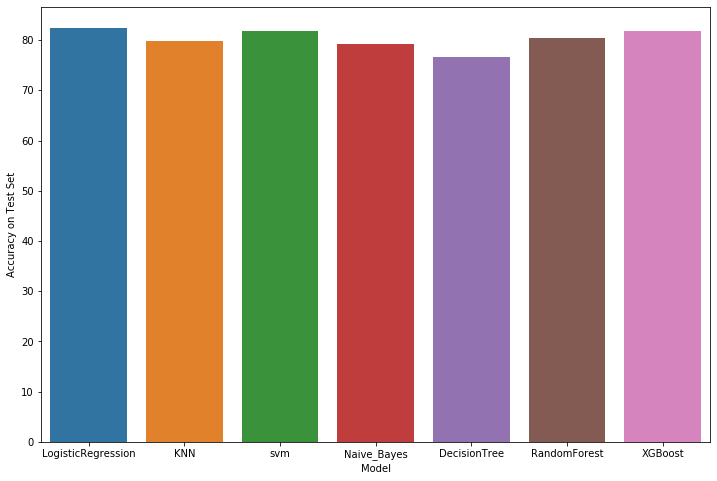

In [62]:
plt.figure(figsize = (12,8))
sns.barplot(x = "Model",y = df1['Accuracy on Test Set'].apply(lambda x: x.strip('%')),data = df1)

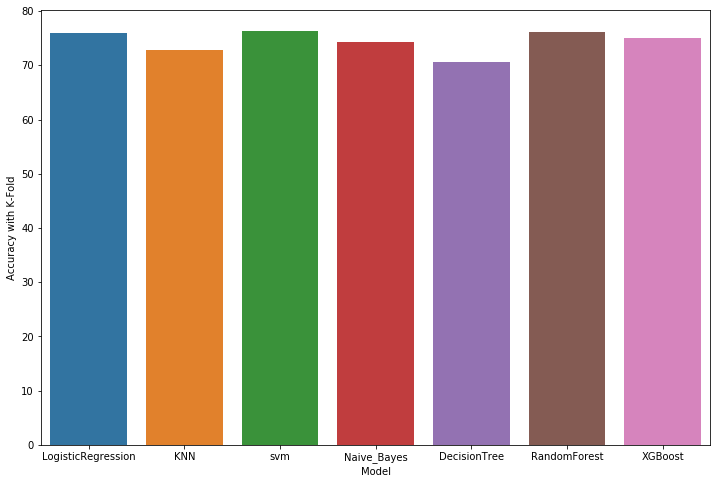

In [63]:
figure(figsize = (12,8))
sns.barplot(x = 'Model',y = df1['Accuracy with K-Fold'].apply(lambda x: x.strip('%')),data = df1)

In [97]:

from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
%matplotlib inline

In [98]:
diabetes

NameError: name 'diabetes' is not defined

In [232]:
## separate dataset of independent and dependent variables
X = dataset.drop(['diabetes'], axis=1)
y = dataset['diabetes']

col_names = list(X.columns)
## craete pipe line with feature scaling
pipeline = Pipeline([
                     ('std_scale', PowerTransformer(method='yeo-johnson'))
])

X = pd.DataFrame(pipeline.fit_transform(X), columns=col_names)

print(X.head())
## split dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.1, random_state=42)

print(f"Size Of The Train Dataset :- {len(X_train)}")
print(f"Size Of The Test Dataset :- {len(X_test)}")

   num_preg  glucose_conc  diastolic_bp  thickness   insulin       bmi  \
0  0.813399      0.848665      0.068935   0.876707 -1.008294  0.174124   
1 -0.833906     -1.123027     -0.306484   0.632185 -1.008294 -0.725726   
2  1.188996      1.930906     -0.427244  -1.430072 -1.008294 -1.129341   
3 -0.833906     -0.996671     -0.306484   0.362347  0.859700 -0.537700   
4 -1.603317      0.506848     -1.693204   0.876707  1.077013  1.477376   

   diab_pred       age      skin  
0   0.821764  1.364180  0.912543  
1  -0.168409  0.126452  0.570897  
2   0.935284  0.230161 -1.332726  
3  -1.298725 -1.480075  0.215362  
4   2.336680  0.327328  0.912543  
Size Of The Train Dataset :- 691
Size Of The Test Dataset :- 77


In [233]:
train_scores = []
test_scores = []

for i in range(1, 25):
  knn_clf = KNeighborsClassifier(n_neighbors=i)
  knn_clf.fit(X_train, y_train)

  train_scores.append(knn_clf.score(X_train, y_train))
  test_scores.append(knn_clf.score(X_test, y_test))

print(f"Max score of Train dataset at K = {train_scores.index(max(train_scores)) + 1} and score :- {max(train_scores)*100}%")
print(f"Max score of Test dataset at K = {test_scores.index(max(test_scores)) + 1} and score :- {round(max(test_scores)*100, 2)}%")

Max score of Train dataset at K = 1 and score :- 100.0%
Max score of Test dataset at K = 12 and score :- 77.92%


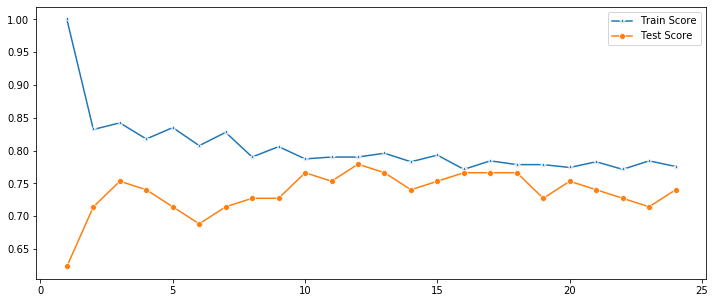

In [234]:
## training history graph 
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,25),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,25),test_scores,marker='o',label='Test Score')

In [226]:
## best score on test data at k = 5

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [227]:
## predict X_test 
y_pred = knn_clf.predict(X_test)
print("\n ***************************** \n")
print(f"Accuracy :- \n {accuracy_score(y_test, y_pred)*100}")
print("\n ***************************** \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}")
print("\n ***************************** \n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


 ***************************** 

Accuracy :- 
 71.42857142857143

 ***************************** 

Confusion Matrix :- 
[[41  9]
 [13 14]]

 ***************************** 

Classification Report :- 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79        50
           1       0.61      0.52      0.56        27

    accuracy                           0.71        77
   macro avg       0.68      0.67      0.67        77
weighted avg       0.71      0.71      0.71        77



In [176]:
Xx.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148,72,35,0,33.6,0.627,50,1.3790
1,1,85,66,29,0,26.6,0.351,31,1.1426
2,8,183,64,0,0,23.3,0.672,32,0.0000
3,1,89,66,23,94,28.1,0.167,21,0.9062
4,0,137,40,35,168,43.1,2.288,33,1.3790


In [183]:
num_preg = 6
glucose_conc = 148
diastolic_bp = 72
thickness = 35
insulin = 0
bmi = 33.6
diab_pred = 0.627
age = 19
skin = 1.3790
x_test1 = [[num_preg, glucose_conc, diastolic_bp, thickness,
           insulin, bmi, diab_pred, age, skin]]

In [181]:
[list(Xx.iloc[0,:].values)]

[[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0, 1.379]]

In [184]:
x_test1

[[6, 148, 72, 35, 0, 33.6, 0.627, 19, 1.379]]

In [110]:
x_test1

[[6, 148, 72, 35, 0, 33.6, 0.627, 50, 1.379]]

In [182]:
for i  in range(0,6):
    inp = [list(Xx.iloc[i,:].values)]
    x_test2 = pipeline.transform(inp)
    output = knn_clf.predict(x_test2)
    print(output)

[1]
[0]
[1]
[0]
[1]
[0]


In [222]:
x_test2 = pipeline.transform(x_test1)


AttributeError: 'LogisticRegression' object has no attribute 'transform'

In [186]:
knn_clf.predict(x_test2)

array([0], dtype=int64)

In [231]:
import pickle
# save the model to disk
filename = 'knn_clf.pkl'
filename1 = 'pipeline.pkl'
pickle.dump(knn_clf, open(filename, 'wb')) 
pickle.dump(pipeline, open(filename1, 'wb')) 
# load the model from disk
model = pickle.load(open(filename, 'rb'))
pipeline= pickle.load(open(filename1, 'rb'))
# pipeline
x_test2 = pipeline.transform([list(Xx.iloc[1,:].values)])
output = model.predict(x_test2)
output

array([0], dtype=int64)

In [145]:
dataset.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [151]:
col = list(dataset.columns)

In [152]:
col.remove('diabetes')

In [153]:
col

['num_preg',
 'glucose_conc',
 'diastolic_bp',
 'thickness',
 'insulin',
 'bmi',
 'diab_pred',
 'age',
 'skin']

In [158]:
for i in col:
    print(i+" nunique "+str(dataset[i].nunique()))

num_preg nunique 17
glucose_conc nunique 136
diastolic_bp nunique 47
thickness nunique 51
insulin nunique 186
bmi nunique 248
diab_pred nunique 517
age nunique 52
skin nunique 51


In [159]:
dataset.describe()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.809136,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.628517,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.906200,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.260800,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,3.900600,1.000000
